In [2]:
import random
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from tqdm import tqdm
import os

In [3]:
dtime = datetime(2019, 4, 30, 00)
dtimestamp = datetime.timestamp(dtime)
ms = int(round(dtimestamp * 1000))
n_it = 100
granularity = 10 #seconds

In [4]:
def generate_scarsity(length, num_series, scarsity_percentage):
	time_series_data = []
	for _ in range(num_series):
		# Ensure the scarsity percentage is between 0 and 100
		scarsity_percentage = max(0, min(100, scarsity_percentage))
		
		time_series = []
		previous_value = random.uniform(0, 1)  # Initialize the first value randomly
		
		for _ in range(length):
			if random.randint(0, 100) <= scarsity_percentage:
				current_value = None 
			else:
				# Generate a new random value
				current_value = random.uniform(0, 1)
			time_series.append(current_value)
			previous_value = current_value
		time_series_data.append(time_series)
	return time_series_data
    
def generate_delta(length, num_series, delta_percentage):
	time_series_data = []
	for _ in range(num_series):
		delta_percentage = max(0, min(100, delta_percentage))
		time_series = []
		previous_value = random.uniform(0, 1)  # Initialize the first value randomly
		for _ in range(length):
			delta = random.uniform(-1 * delta_percentage, delta_percentage )  
			current_value = previous_value + delta
			time_series.append(current_value)
			previous_value = current_value
		time_series_data.append(time_series)
	return time_series_data
    
def export(ts, file):
	try:
		os.mkdir("../datasets/compression/")
	except FileExistsError:
		pass
	df = pd.DataFrame(ts).T
	df['time'] = [datetime.fromtimestamp((ms + i * 1000 * granularity) // 1000).strftime("%Y-%m-%dT%H:%M:%S") for i in range(len(df))] #2019-03-01T00:00:00
	df['st'] = ['st' + str(i // (len(df) // 10)) for i in range(len(df))] 
	df = df[ ['time'] + ['st'] + [ col for col in df.columns if col != 'time' and col != 'st' ] ]
	col_names = list(df.columns)
	df.columns = col_names[:2] + [ "s"+str(id) for id in col_names[2:]]
	df = df.rename(columns={'st': 'id_station'})
	df.to_csv("../datasets/compression/"+file, index=False)
	print(df)
	return df

def generate_repeats(length, num_series, repeats_percentage):
	time_series_data = []
	for _ in range(num_series):
		# Ensure the repeats percentage is between 0 and 100
		repeats_percentage = max(0, min(100, repeats_percentage))
		
		time_series = []
		previous_value = random.uniform(0, 1)  # Initialize the first value randomly
		
		for _ in range(length):
			if random.randint(0, 100) < repeats_percentage:
				current_value = previous_value 
			else:
				# Generate a new random value
				current_value = random.uniform(0, 1)
			
			# Ensure the generated value stays within the [0, 1] range
			current_value = max(0, min(1, current_value))
			
			time_series.append(current_value)
			previous_value = current_value
		time_series_data.append(time_series)
	return time_series_data

                    time id_station        s0        s1        s2        s3  \
0    2019-04-30T00:00:00        st0  0.835353  0.371705  0.185937  0.485722   
1    2019-04-30T00:00:10        st0  0.942378  0.865956  0.328834  0.599985   
2    2019-04-30T00:00:20        st0  0.602147  0.846039  0.923197  0.190369   
3    2019-04-30T00:00:30        st0  0.356125  0.308141  0.747969  0.696282   
4    2019-04-30T00:00:40        st0  0.348306  0.056731  0.913622  0.219383   
..                   ...        ...       ...       ...       ...       ...   
995  2019-04-30T02:45:50        st9  0.207839  0.383184  0.896015  0.383289   
996  2019-04-30T02:46:00        st9  0.453969  0.727116  0.130119  0.212176   
997  2019-04-30T02:46:10        st9  0.915060  0.051447  0.386577  0.427775   
998  2019-04-30T02:46:20        st9  0.438241  0.923729  0.988915  0.454942   
999  2019-04-30T02:46:30        st9  0.916265  0.232256  0.166209  0.264572   

           s4        s5        s6        s7  ...   

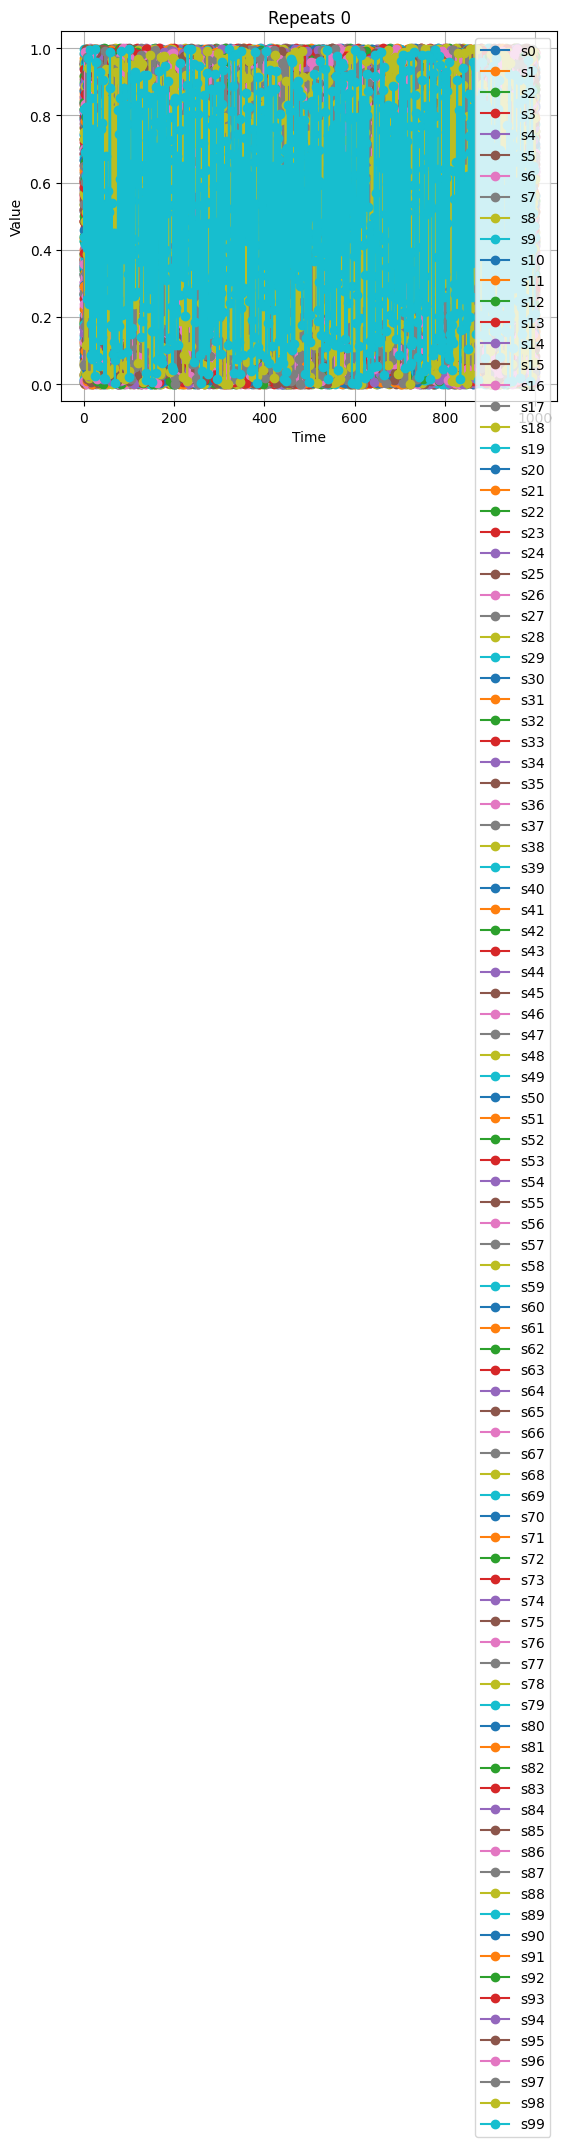

                    time id_station        s0        s1        s2        s3  \
0    2019-04-30T00:00:00        st0  0.579854  0.641584  0.530823  0.598364   
1    2019-04-30T00:00:10        st0  0.579854  0.036545  0.619805  0.232013   
2    2019-04-30T00:00:20        st0  0.175611  0.461097  0.808372  0.385487   
3    2019-04-30T00:00:30        st0  0.175611  0.461097  0.028610  0.879709   
4    2019-04-30T00:00:40        st0  0.901025  0.555883  0.832523  0.337115   
..                   ...        ...       ...       ...       ...       ...   
995  2019-04-30T02:45:50        st9  0.192922  0.335854  0.260790  0.497385   
996  2019-04-30T02:46:00        st9  0.009861  0.891358  0.433879  0.844209   
997  2019-04-30T02:46:10        st9  0.951937  0.404351  0.277236  0.261177   
998  2019-04-30T02:46:20        st9  0.380717  0.245408  0.860335  0.155393   
999  2019-04-30T02:46:30        st9  0.607308  0.499491  0.385418  0.739100   

           s4        s5        s6        s7  ...   

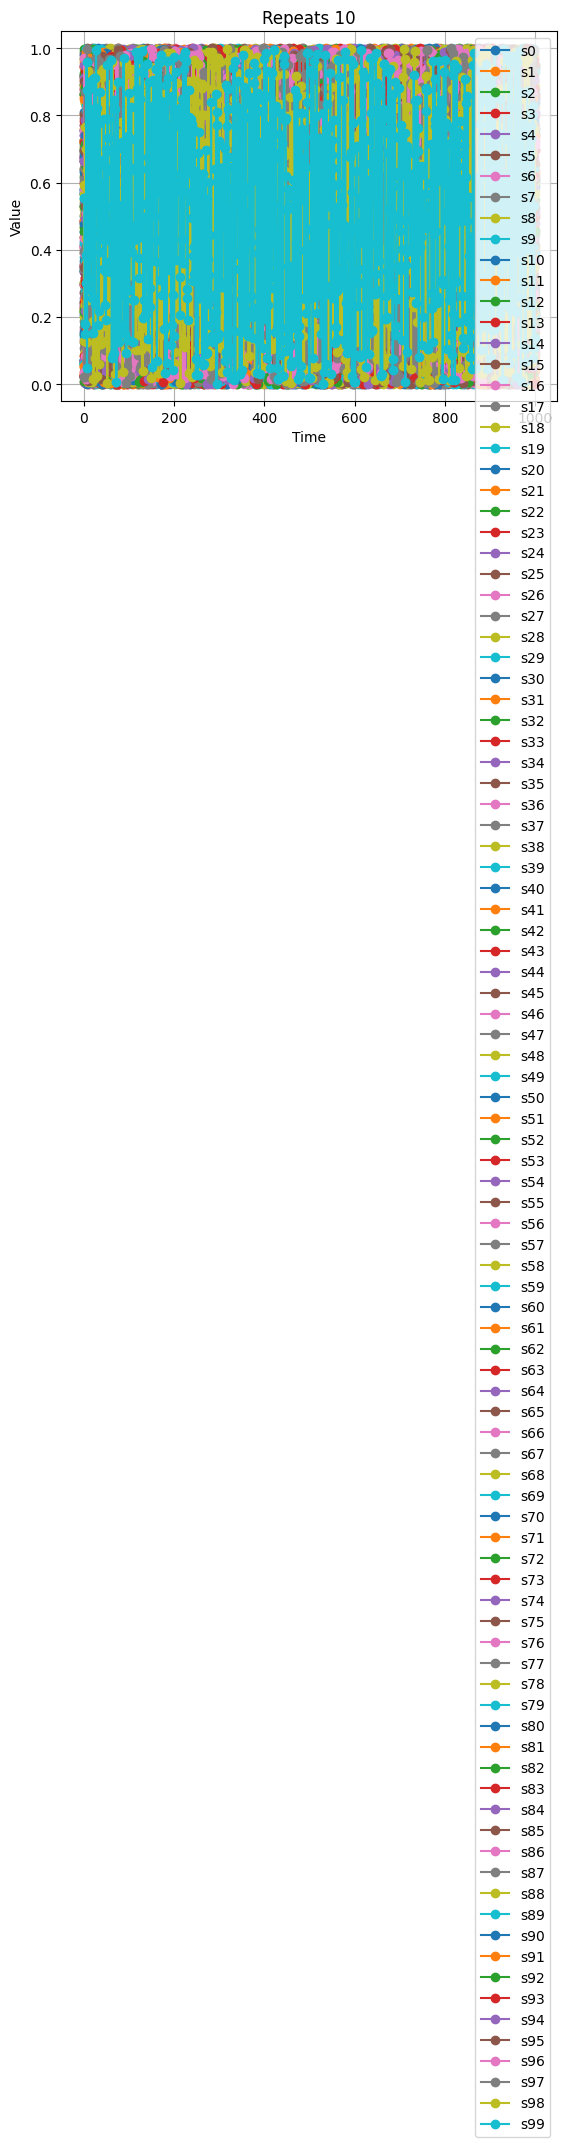

                    time id_station        s0        s1        s2        s3  \
0    2019-04-30T00:00:00        st0  0.046203  0.723392  0.937540  0.960172   
1    2019-04-30T00:00:10        st0  0.336617  0.361164  0.386382  0.040119   
2    2019-04-30T00:00:20        st0  0.316708  0.811699  0.386382  0.040119   
3    2019-04-30T00:00:30        st0  0.316708  0.108485  0.021652  0.067799   
4    2019-04-30T00:00:40        st0  0.184608  0.108485  0.745318  0.707363   
..                   ...        ...       ...       ...       ...       ...   
995  2019-04-30T02:45:50        st9  0.474953  0.847164  0.186138  0.598559   
996  2019-04-30T02:46:00        st9  0.592745  0.800209  0.186138  0.377417   
997  2019-04-30T02:46:10        st9  0.128764  0.808223  0.186138  0.775158   
998  2019-04-30T02:46:20        st9  0.106848  0.536075  0.191477  0.784921   
999  2019-04-30T02:46:30        st9  0.252078  0.250577  0.334052  0.535801   

           s4        s5        s6        s7  ...   

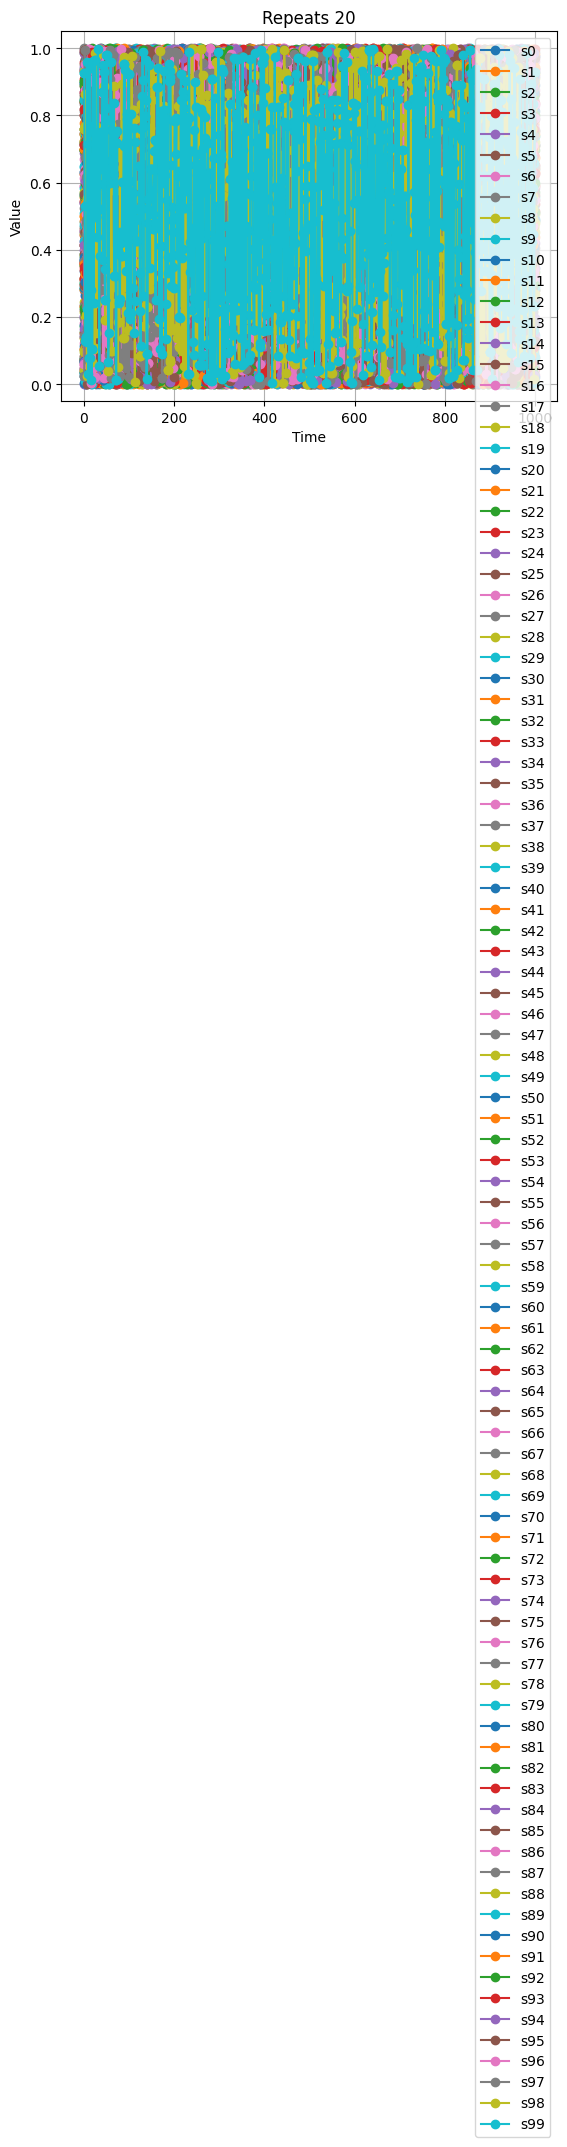

                    time id_station        s0        s1        s2        s3  \
0    2019-04-30T00:00:00        st0  0.509391  0.711915  0.399809  0.553124   
1    2019-04-30T00:00:10        st0  0.509391  0.986361  0.418532  0.214441   
2    2019-04-30T00:00:20        st0  0.509391  0.523015  0.582711  0.214441   
3    2019-04-30T00:00:30        st0  0.084681  0.369968  0.800909  0.214441   
4    2019-04-30T00:00:40        st0  0.683418  0.117787  0.069624  0.236566   
..                   ...        ...       ...       ...       ...       ...   
995  2019-04-30T02:45:50        st9  0.556628  0.202366  0.203601  0.057328   
996  2019-04-30T02:46:00        st9  0.360992  0.429120  0.892274  0.057328   
997  2019-04-30T02:46:10        st9  0.360992  0.545806  0.857914  0.485790   
998  2019-04-30T02:46:20        st9  0.715626  0.751453  0.399315  0.872766   
999  2019-04-30T02:46:30        st9  0.379347  0.129679  0.399315  0.553550   

           s4        s5        s6        s7  ...   

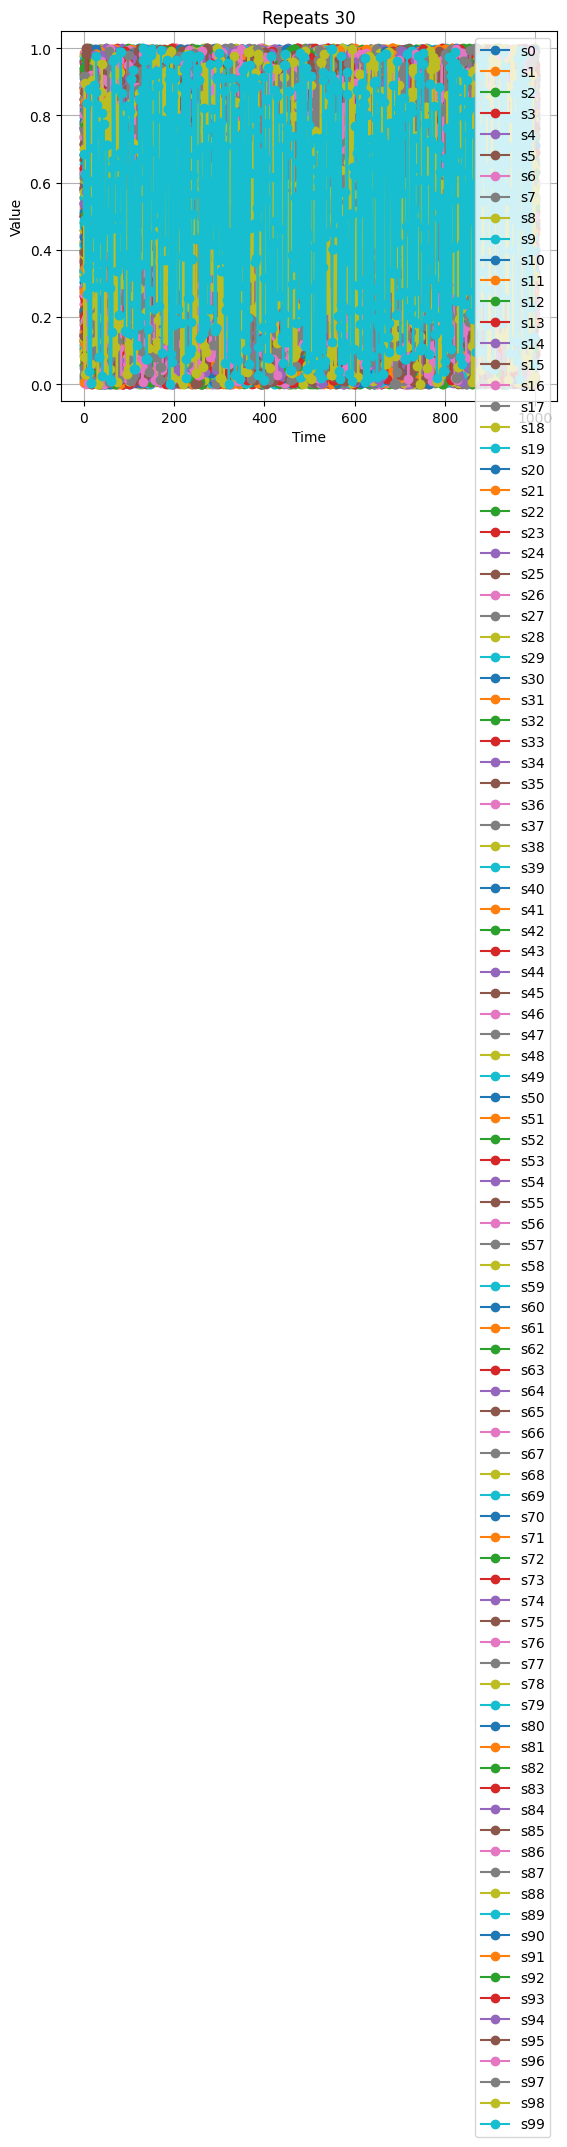

                    time id_station        s0        s1        s2        s3  \
0    2019-04-30T00:00:00        st0  0.286591  0.649800  0.259653  0.926398   
1    2019-04-30T00:00:10        st0  0.286591  0.649800  0.895777  0.674402   
2    2019-04-30T00:00:20        st0  0.651385  0.178573  0.706563  0.674402   
3    2019-04-30T00:00:30        st0  0.408608  0.678849  0.706563  0.674402   
4    2019-04-30T00:00:40        st0  0.961093  0.678849  0.706563  0.674402   
..                   ...        ...       ...       ...       ...       ...   
995  2019-04-30T02:45:50        st9  0.812407  0.339842  0.780494  0.560421   
996  2019-04-30T02:46:00        st9  0.166659  0.339842  0.780494  0.560421   
997  2019-04-30T02:46:10        st9  0.166659  0.911832  0.780494  0.899932   
998  2019-04-30T02:46:20        st9  0.497870  0.181200  0.780494  0.920494   
999  2019-04-30T02:46:30        st9  0.921196  0.068284  0.174872  0.683713   

           s4        s5        s6        s7  ...   

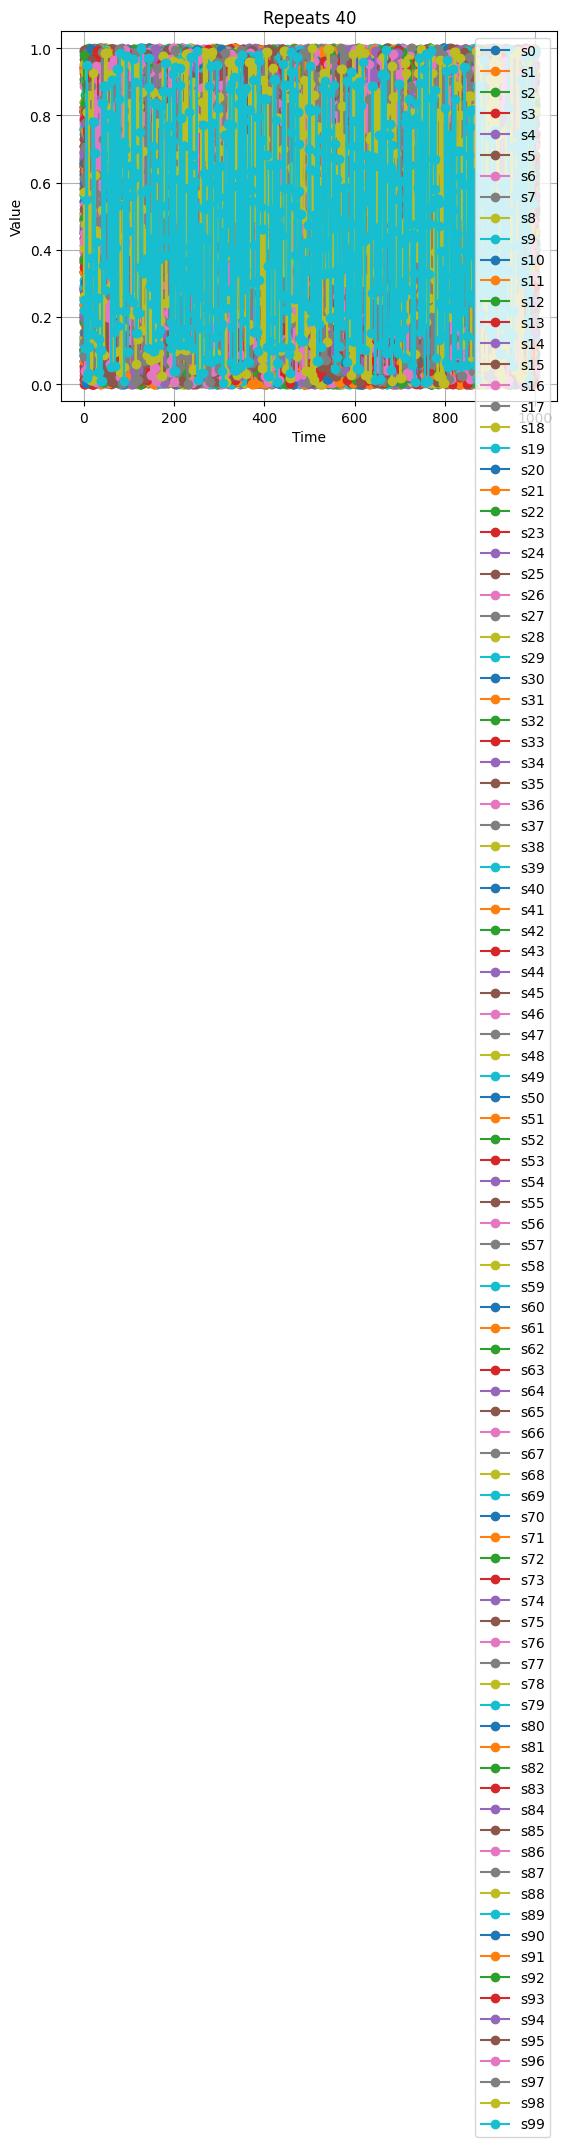

                    time id_station        s0        s1        s2        s3  \
0    2019-04-30T00:00:00        st0  0.423361  0.868085  0.463900  0.132068   
1    2019-04-30T00:00:10        st0  0.423361  0.868085  0.463900  0.235550   
2    2019-04-30T00:00:20        st0  0.423361  0.868085  0.371875  0.235550   
3    2019-04-30T00:00:30        st0  0.423361  0.581926  0.371875  0.179888   
4    2019-04-30T00:00:40        st0  0.004244  0.581926  0.371875  0.451458   
..                   ...        ...       ...       ...       ...       ...   
995  2019-04-30T02:45:50        st9  0.449765  0.680884  0.584752  0.178945   
996  2019-04-30T02:46:00        st9  0.449765  0.756336  0.584752  0.799642   
997  2019-04-30T02:46:10        st9  0.849279  0.756336  0.033028  0.799642   
998  2019-04-30T02:46:20        st9  0.343467  0.861911  0.409403  0.689601   
999  2019-04-30T02:46:30        st9  0.343467  0.185349  0.056467  0.024815   

           s4        s5        s6        s7  ...   

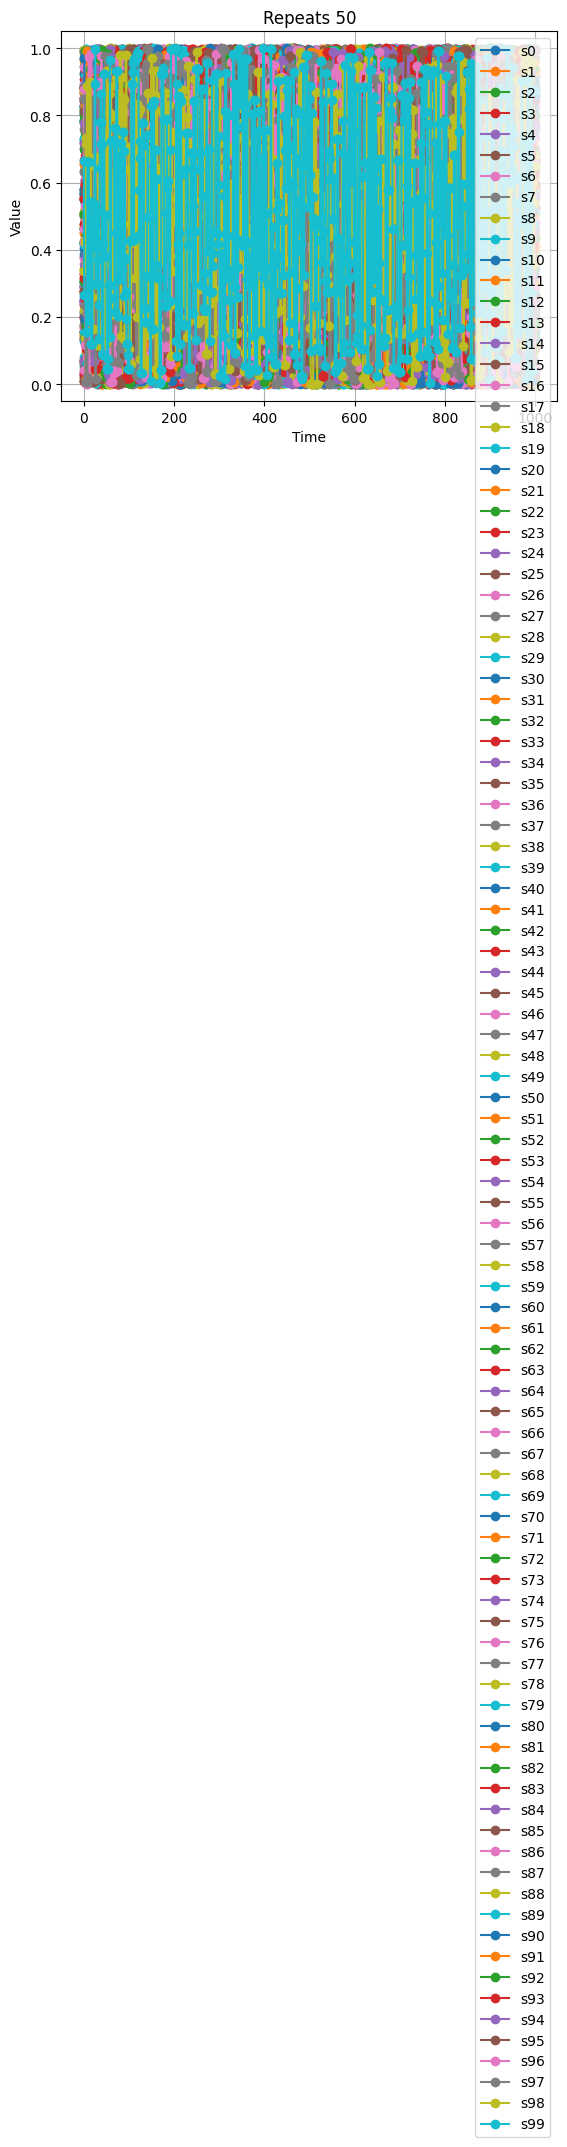

                    time id_station        s0        s1        s2        s3  \
0    2019-04-30T00:00:00        st0  0.977705  0.166560  0.593670  0.249556   
1    2019-04-30T00:00:10        st0  0.977705  0.462890  0.593670  0.249556   
2    2019-04-30T00:00:20        st0  0.291450  0.897365  0.593670  0.820593   
3    2019-04-30T00:00:30        st0  0.038038  0.897365  0.018335  0.820593   
4    2019-04-30T00:00:40        st0  0.038038  0.897365  0.018335  0.820593   
..                   ...        ...       ...       ...       ...       ...   
995  2019-04-30T02:45:50        st9  0.958444  0.481110  0.379685  0.229230   
996  2019-04-30T02:46:00        st9  0.458334  0.481110  0.379685  0.229230   
997  2019-04-30T02:46:10        st9  0.002726  0.481110  0.379685  0.229230   
998  2019-04-30T02:46:20        st9  0.463784  0.481110  0.932418  0.229230   
999  2019-04-30T02:46:30        st9  0.463784  0.481110  0.932418  0.229230   

           s4        s5        s6        s7  ...   

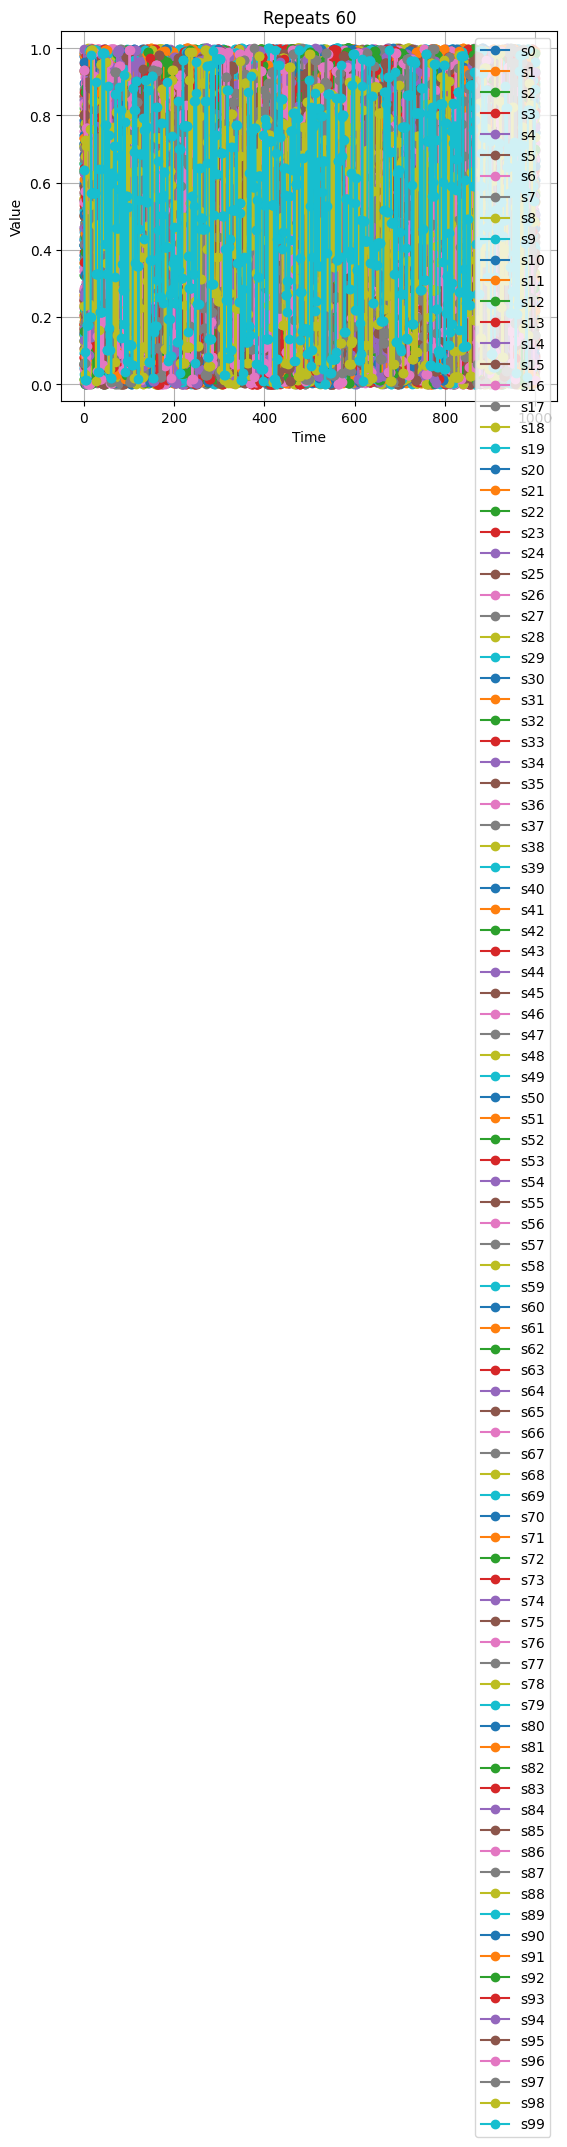

                    time id_station        s0        s1        s2        s3  \
0    2019-04-30T00:00:00        st0  0.970371  0.236987  0.709684  0.726014   
1    2019-04-30T00:00:10        st0  0.140212  0.236987  0.709684  0.726014   
2    2019-04-30T00:00:20        st0  0.140212  0.236987  0.709684  0.726014   
3    2019-04-30T00:00:30        st0  0.140212  0.236987  0.709684  0.607408   
4    2019-04-30T00:00:40        st0  0.140212  0.117562  0.689302  0.607408   
..                   ...        ...       ...       ...       ...       ...   
995  2019-04-30T02:45:50        st9  0.585220  0.659934  0.521001  0.249647   
996  2019-04-30T02:46:00        st9  0.763101  0.659934  0.521001  0.249647   
997  2019-04-30T02:46:10        st9  0.763101  0.659934  0.141926  0.475971   
998  2019-04-30T02:46:20        st9  0.763101  0.414414  0.141926  0.823074   
999  2019-04-30T02:46:30        st9  0.763101  0.414414  0.141926  0.823074   

           s4        s5        s6        s7  ...   

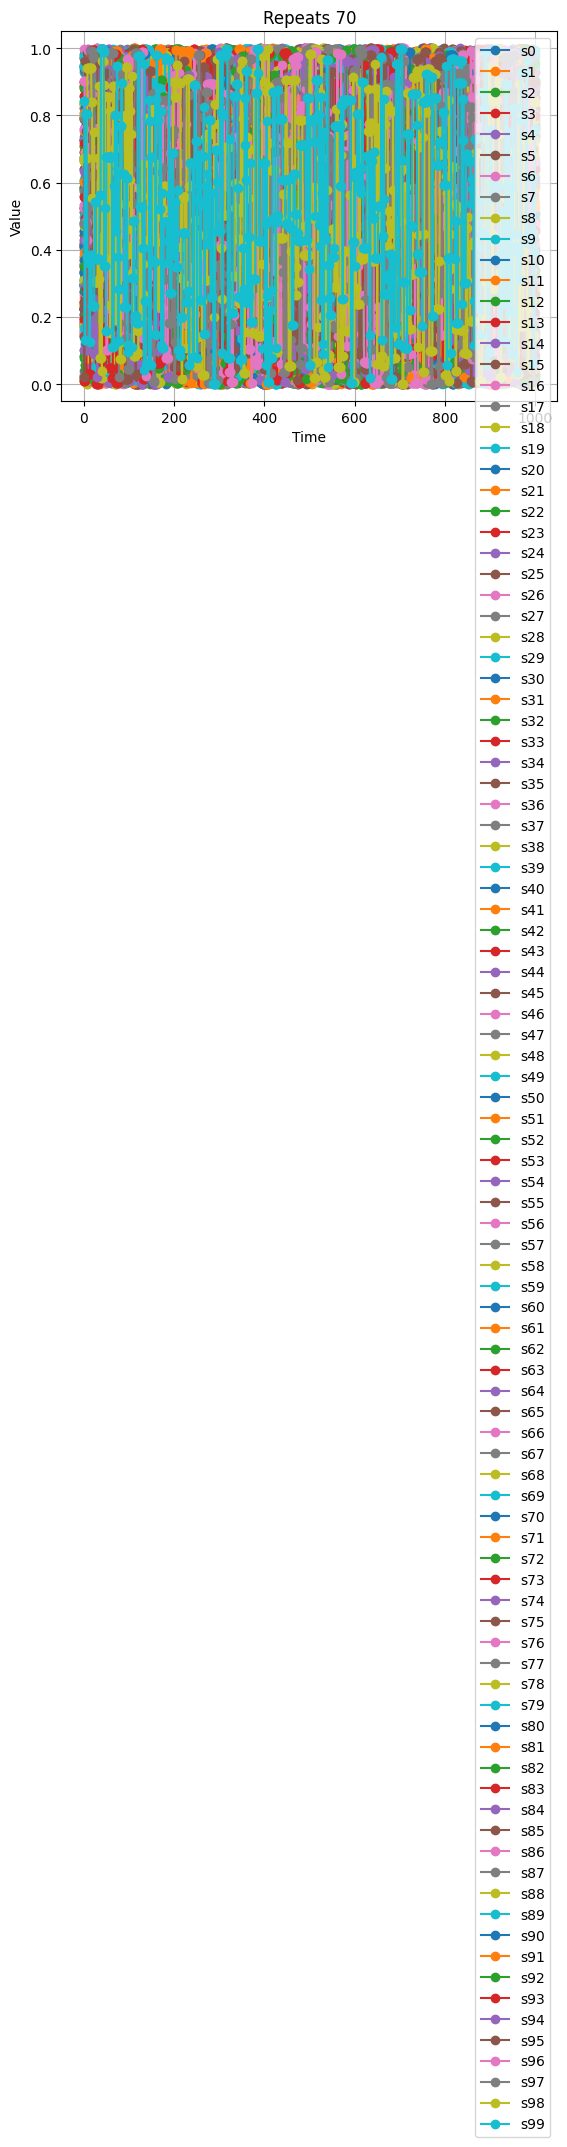

                    time id_station        s0        s1        s2        s3  \
0    2019-04-30T00:00:00        st0  0.268700  0.280636  0.158966  0.852062   
1    2019-04-30T00:00:10        st0  0.268700  0.981361  0.158966  0.852062   
2    2019-04-30T00:00:20        st0  0.411690  0.981361  0.158966  0.852062   
3    2019-04-30T00:00:30        st0  0.411690  0.468257  0.158966  0.852062   
4    2019-04-30T00:00:40        st0  0.411690  0.596850  0.158966  0.852062   
..                   ...        ...       ...       ...       ...       ...   
995  2019-04-30T02:45:50        st9  0.039073  0.746747  0.553549  0.291166   
996  2019-04-30T02:46:00        st9  0.039073  0.746747  0.553549  0.291166   
997  2019-04-30T02:46:10        st9  0.039073  0.746747  0.553549  0.803777   
998  2019-04-30T02:46:20        st9  0.039073  0.746747  0.553549  0.196231   
999  2019-04-30T02:46:30        st9  0.039073  0.746747  0.892378  0.196231   

           s4        s5        s6        s7  ...   

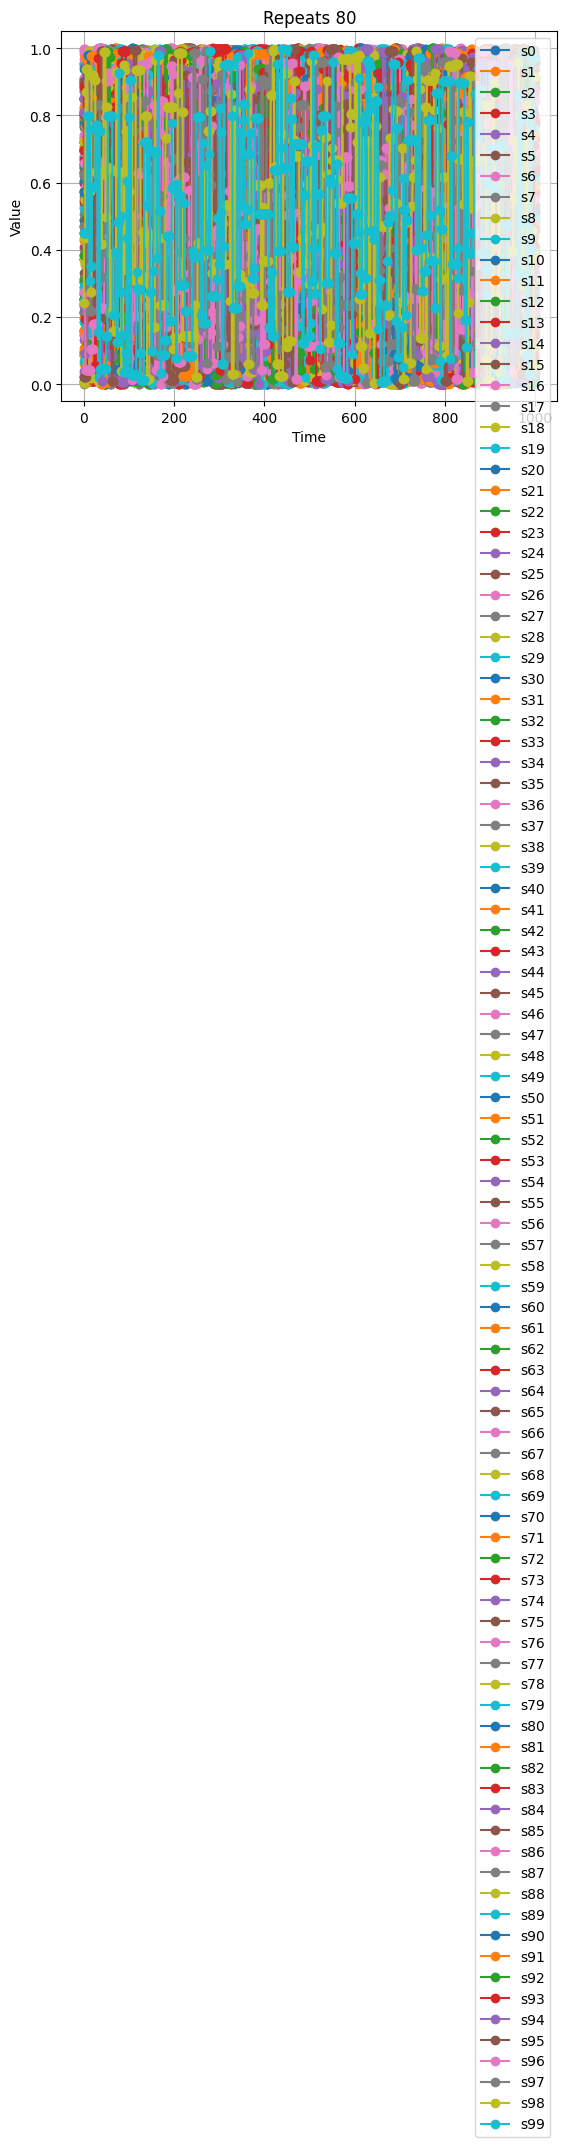

                    time id_station        s0        s1        s2        s3  \
0    2019-04-30T00:00:00        st0  0.238919  0.225014  0.387642  0.975108   
1    2019-04-30T00:00:10        st0  0.238919  0.225014  0.387642  0.975108   
2    2019-04-30T00:00:20        st0  0.238919  0.225014  0.387642  0.975108   
3    2019-04-30T00:00:30        st0  0.238919  0.225014  0.387642  0.975108   
4    2019-04-30T00:00:40        st0  0.238919  0.225014  0.387642  0.975108   
..                   ...        ...       ...       ...       ...       ...   
995  2019-04-30T02:45:50        st9  0.184473  0.444970  0.862924  0.553448   
996  2019-04-30T02:46:00        st9  0.184473  0.444970  0.862924  0.553448   
997  2019-04-30T02:46:10        st9  0.184473  0.444970  0.862924  0.553448   
998  2019-04-30T02:46:20        st9  0.354664  0.562737  0.862924  0.244844   
999  2019-04-30T02:46:30        st9  0.942618  0.419884  0.862924  0.244844   

           s4        s5        s6        s7  ...   

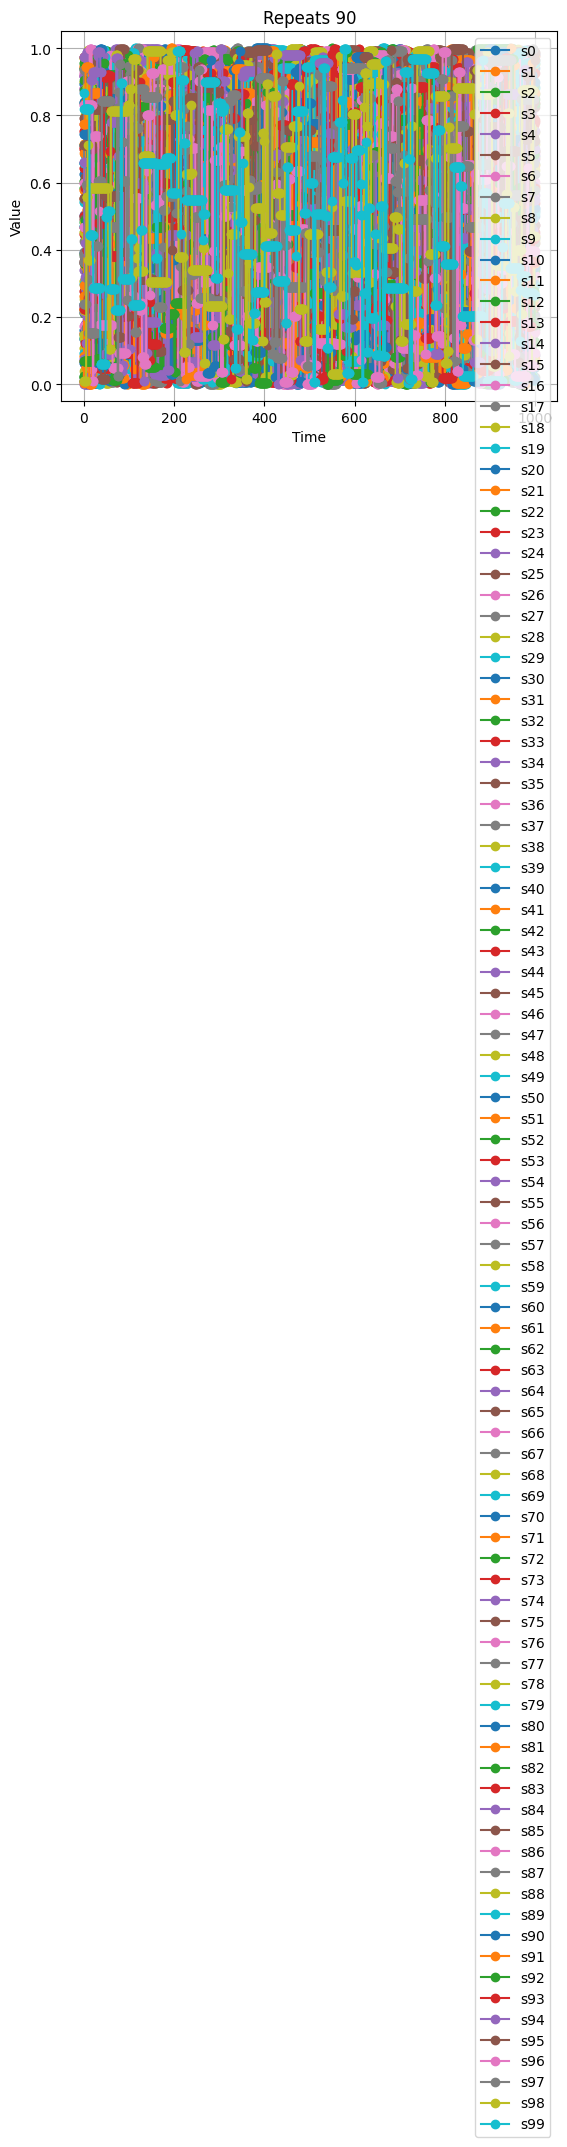

                    time id_station        s0        s1        s2        s3  \
0    2019-04-30T00:00:00        st0  0.568955  0.604483  0.865019  0.609704   
1    2019-04-30T00:00:10        st0  0.568955  0.604483  0.865019  0.609704   
2    2019-04-30T00:00:20        st0  0.568955  0.604483  0.865019  0.609704   
3    2019-04-30T00:00:30        st0  0.568955  0.604483  0.865019  0.609704   
4    2019-04-30T00:00:40        st0  0.568955  0.604483  0.865019  0.609704   
..                   ...        ...       ...       ...       ...       ...   
995  2019-04-30T02:45:50        st9  0.759255  0.961643  0.926031  0.490352   
996  2019-04-30T02:46:00        st9  0.759255  0.961643  0.926031  0.490352   
997  2019-04-30T02:46:10        st9  0.759255  0.961643  0.926031  0.490352   
998  2019-04-30T02:46:20        st9  0.759255  0.961643  0.926031  0.490352   
999  2019-04-30T02:46:30        st9  0.759255  0.961643  0.926031  0.490352   

           s4        s5        s6        s7  ...   

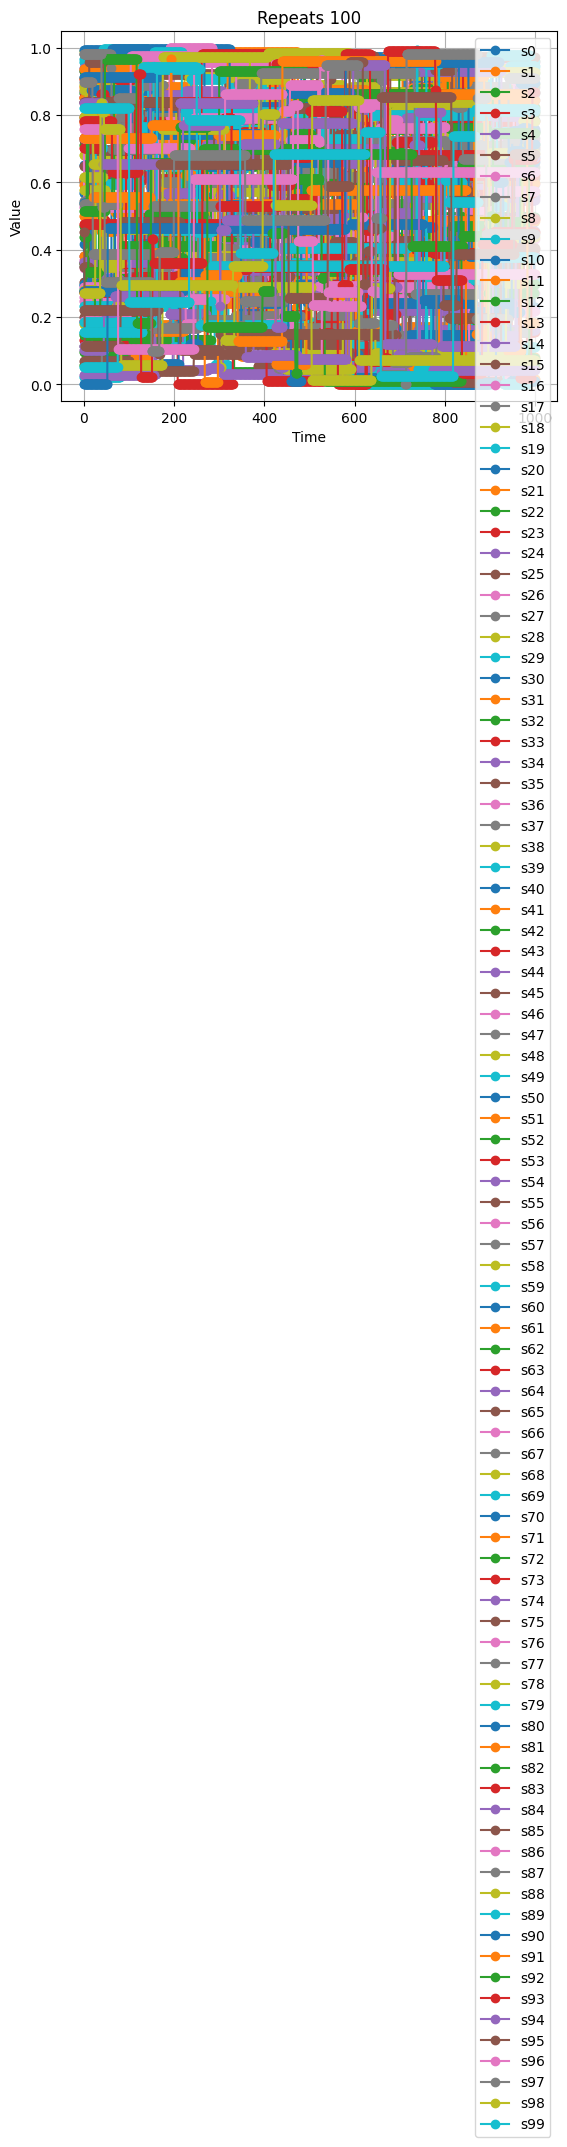

                    time id_station        s0        s1        s2        s3  \
0    2019-04-30T00:00:00        st0  0.099049  0.000823  0.329278  0.848772   
1    2019-04-30T00:00:10        st0  0.048190  0.249767  0.991477       NaN   
2    2019-04-30T00:00:20        st0       NaN  0.885943  0.974455  0.902582   
3    2019-04-30T00:00:30        st0  0.540088       NaN  0.740213  0.354428   
4    2019-04-30T00:00:40        st0  0.817665  0.823264  0.872364  0.630405   
..                   ...        ...       ...       ...       ...       ...   
995  2019-04-30T02:45:50        st9  0.707551  0.834576  0.022304       NaN   
996  2019-04-30T02:46:00        st9  0.313229       NaN  0.972901  0.985621   
997  2019-04-30T02:46:10        st9  0.645140  0.076897  0.555082  0.245486   
998  2019-04-30T02:46:20        st9  0.333838  0.947932  0.585571  0.296254   
999  2019-04-30T02:46:30        st9  0.051789       NaN  0.000359  0.098393   

           s4        s5        s6        s7  ...   

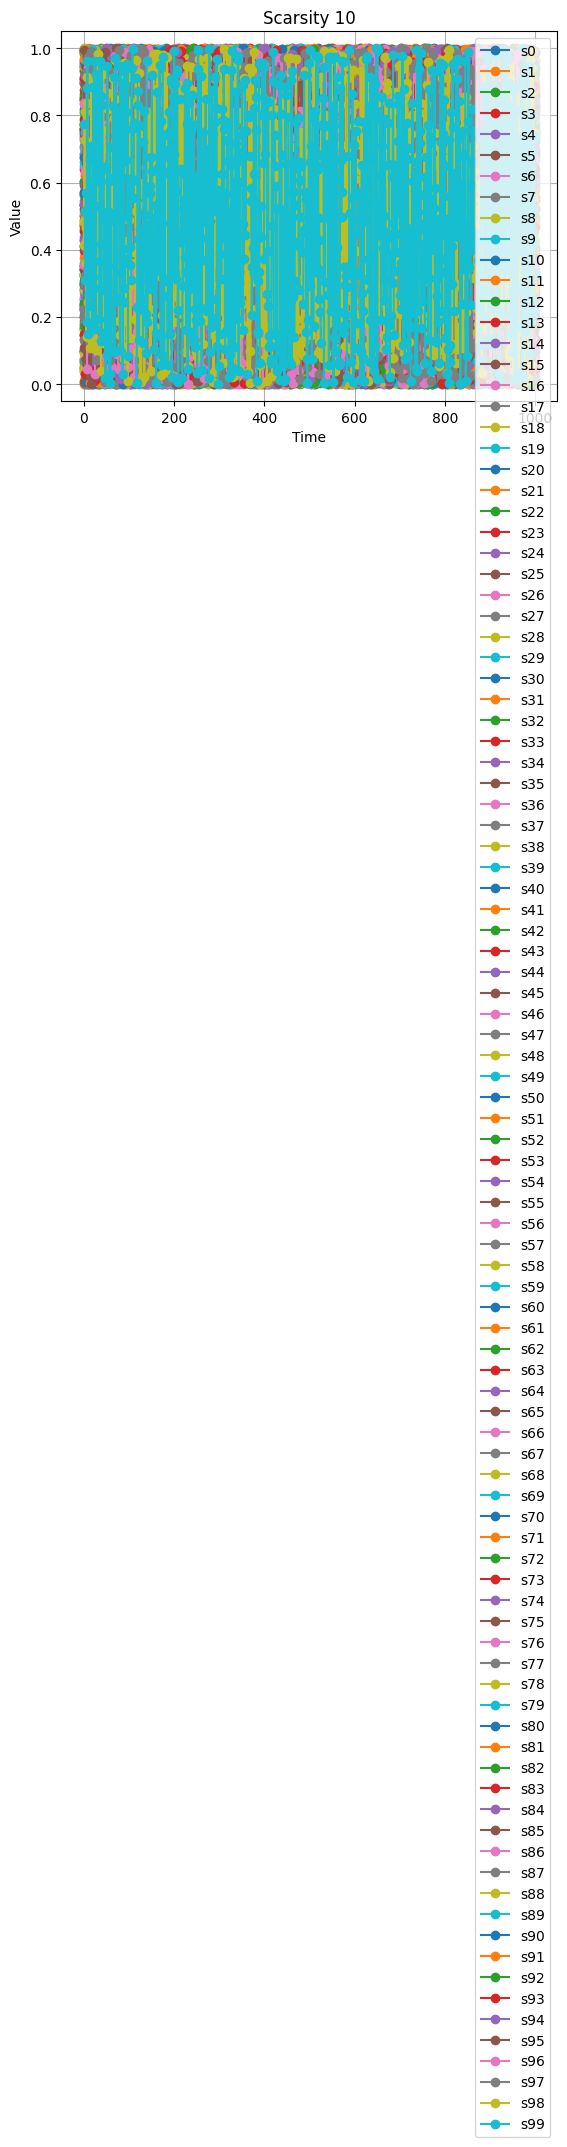

                    time id_station        s0        s1        s2        s3  \
0    2019-04-30T00:00:00        st0  0.640877  0.179826  0.899824       NaN   
1    2019-04-30T00:00:10        st0  0.427829  0.683201       NaN  0.891707   
2    2019-04-30T00:00:20        st0       NaN       NaN  0.443293  0.335491   
3    2019-04-30T00:00:30        st0  0.840244       NaN       NaN       NaN   
4    2019-04-30T00:00:40        st0  0.124575  0.398742       NaN       NaN   
..                   ...        ...       ...       ...       ...       ...   
995  2019-04-30T02:45:50        st9  0.424392       NaN       NaN  0.009428   
996  2019-04-30T02:46:00        st9       NaN       NaN  0.093808  0.806883   
997  2019-04-30T02:46:10        st9  0.445868  0.201957  0.768132  0.728862   
998  2019-04-30T02:46:20        st9  0.854029  0.955035  0.590586  0.492239   
999  2019-04-30T02:46:30        st9  0.190084       NaN  0.380216       NaN   

           s4        s5        s6        s7  ...   

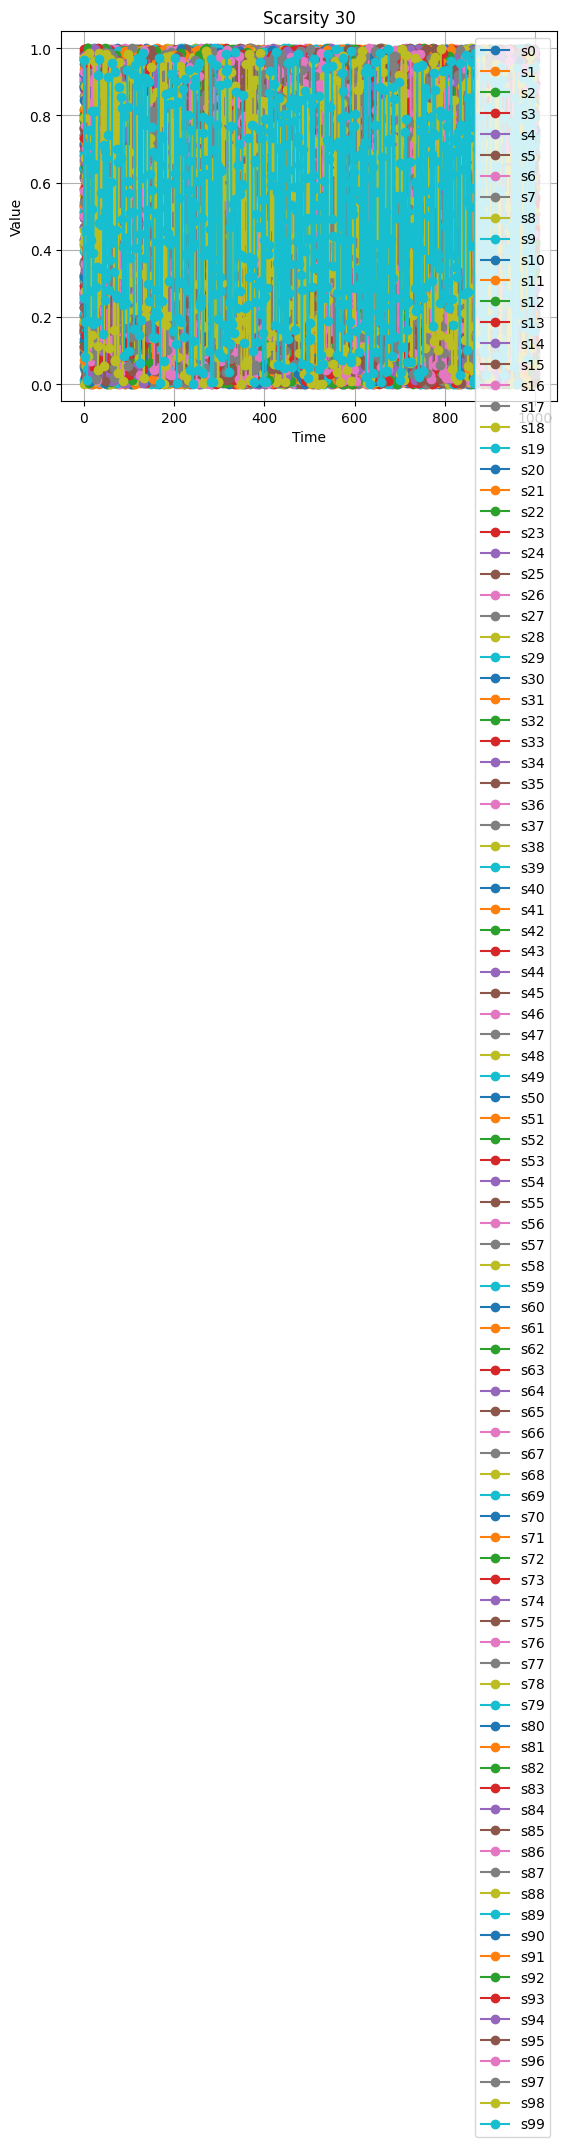

                    time id_station        s0        s1        s2        s3  \
0    2019-04-30T00:00:00        st0  0.200197  0.688877       NaN  0.728769   
1    2019-04-30T00:00:10        st0  0.051181       NaN  0.633185  0.159239   
2    2019-04-30T00:00:20        st0  0.920805       NaN  0.364663       NaN   
3    2019-04-30T00:00:30        st0  0.966078       NaN  0.971930       NaN   
4    2019-04-30T00:00:40        st0       NaN       NaN  0.298877  0.559353   
..                   ...        ...       ...       ...       ...       ...   
995  2019-04-30T02:45:50        st9  0.298847  0.187118  0.581397       NaN   
996  2019-04-30T02:46:00        st9       NaN       NaN  0.823769  0.301022   
997  2019-04-30T02:46:10        st9       NaN       NaN  0.286615  0.442501   
998  2019-04-30T02:46:20        st9  0.200798       NaN       NaN  0.273503   
999  2019-04-30T02:46:30        st9       NaN  0.736210       NaN  0.191395   

           s4        s5        s6        s7  ...   

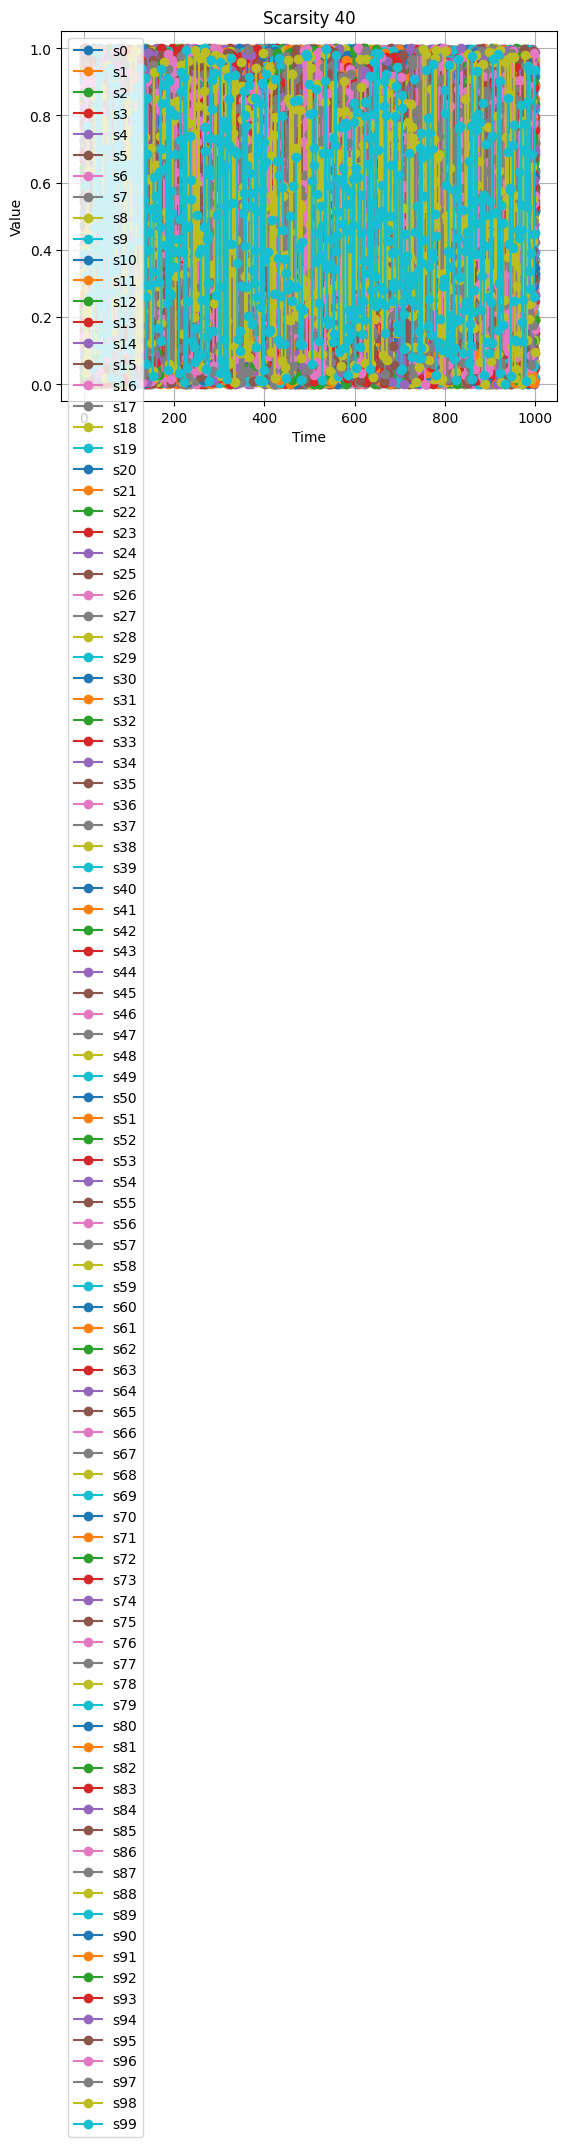

                    time id_station        s0       s1        s2        s3  \
0    2019-04-30T00:00:00        st0       NaN      NaN       NaN       NaN   
1    2019-04-30T00:00:10        st0  0.738960      NaN  0.135316       NaN   
2    2019-04-30T00:00:20        st0  0.805394      NaN       NaN       NaN   
3    2019-04-30T00:00:30        st0       NaN      NaN       NaN       NaN   
4    2019-04-30T00:00:40        st0  0.441735      NaN       NaN  0.889029   
..                   ...        ...       ...      ...       ...       ...   
995  2019-04-30T02:45:50        st9       NaN      NaN       NaN       NaN   
996  2019-04-30T02:46:00        st9       NaN      NaN       NaN       NaN   
997  2019-04-30T02:46:10        st9       NaN      NaN       NaN  0.488768   
998  2019-04-30T02:46:20        st9       NaN      NaN       NaN       NaN   
999  2019-04-30T02:46:30        st9       NaN  0.95477       NaN  0.306871   

           s4        s5        s6        s7  ...       s90     

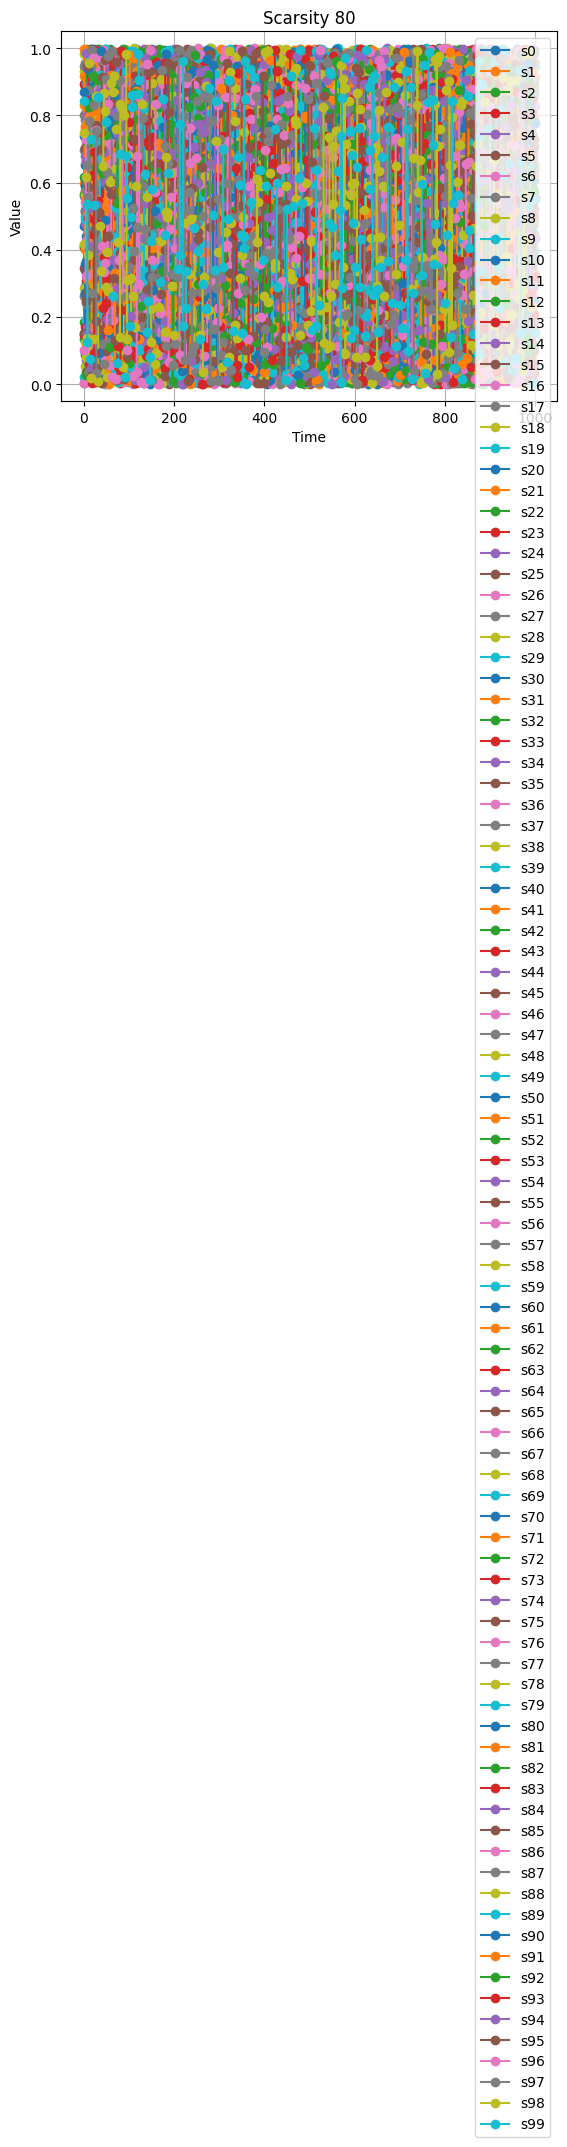

                    time id_station    s0    s1    s2    s3    s4    s5    s6  \
0    2019-04-30T00:00:00        st0  None  None  None  None  None  None  None   
1    2019-04-30T00:00:10        st0  None  None  None  None  None  None  None   
2    2019-04-30T00:00:20        st0  None  None  None  None  None  None  None   
3    2019-04-30T00:00:30        st0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4    2019-04-30T00:00:40        st0  None  None  None  None  None  None  None   
..                   ...        ...   ...   ...   ...   ...   ...   ...   ...   
995  2019-04-30T02:45:50        st9   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
996  2019-04-30T02:46:00        st9  None  None  None  None  None  None  None   
997  2019-04-30T02:46:10        st9   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
998  2019-04-30T02:46:20        st9   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
999  2019-04-30T02:46:30        st9   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

       s7  ...   s90   s91 

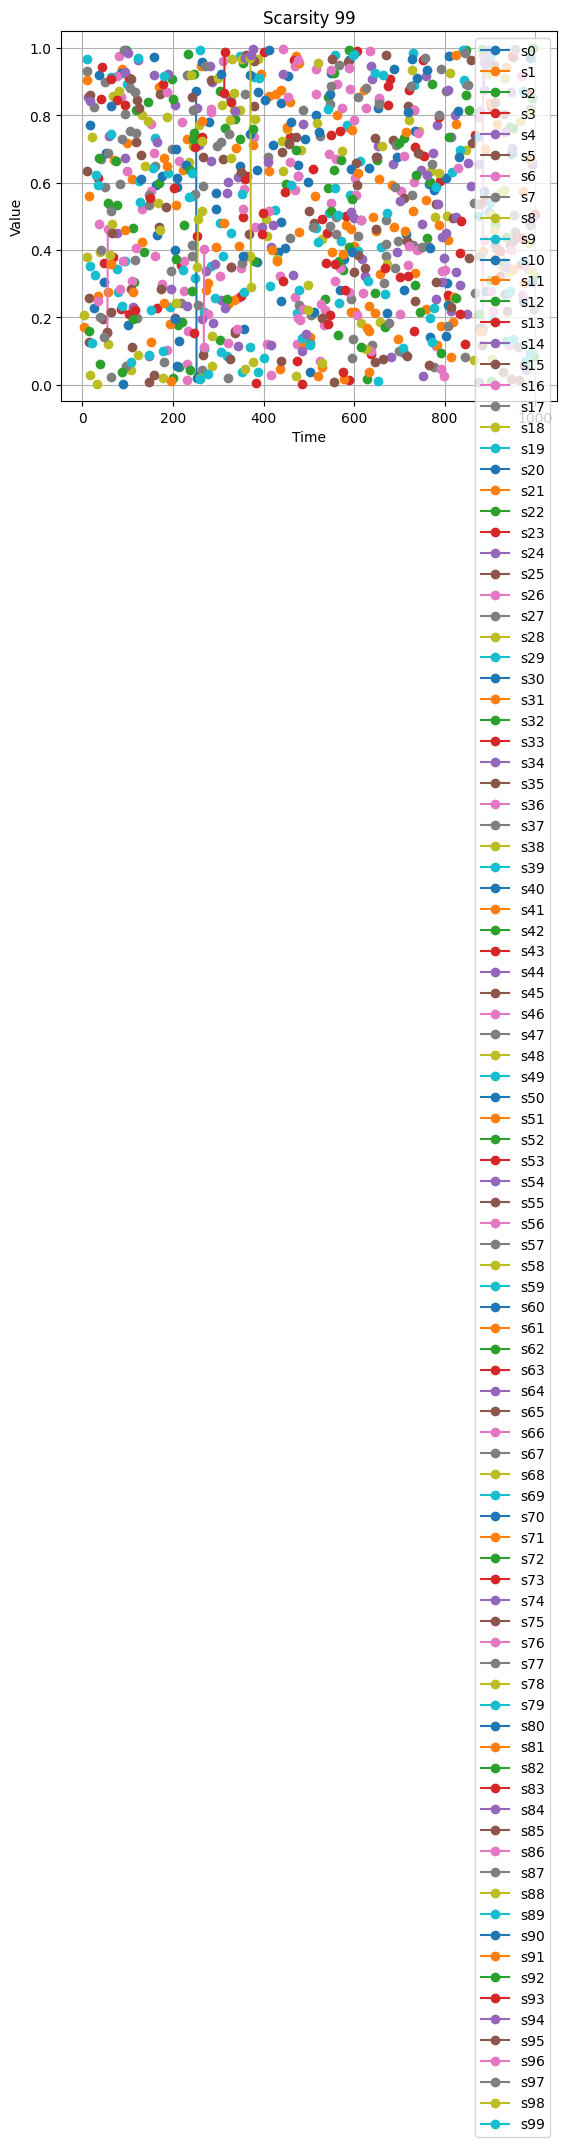

In [5]:
length=1000
num_series = 100
repeats_percentage=20
scarsity_percentage=50
delta_percentage=1



for repeats_percentage in [0,10,20,30,40,50,60,70,80,90,100]:
    time_series_data = generate_repeats(length, num_series, repeats_percentage)
    time_series_data = export(time_series_data, 'repeats_'+str(repeats_percentage)+'.csv')
    # Plot the time series
    time_series_data.plot(marker='o', linestyle='-')
    plt.title('Repeats ' + str(repeats_percentage) )
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()



# time_series_data = generate_repeats(length, num_series, repeats_percentage)
# time_series_data = export(time_series_data, 'repeats_'+str(repeats_percentage)+'.csv')
# # Plot the time series
# time_series_data.plot(marker='o', linestyle='-')
# plt.title('Repeats ' + str(repeats_percentage) )
# plt.xlabel('Time')
# plt.ylabel('Value')
# plt.grid(True)
# plt.show()

scarsity_percentage = 10
time_series_data = generate_scarsity(length, num_series, scarsity_percentage)
time_series_data = export(time_series_data, 'scarsity_'+str(scarsity_percentage)+'.csv')
time_series_data.plot(marker='o', linestyle='-')
plt.title('Scarsity ' + str(scarsity_percentage) )
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()

scarsity_percentage = 30
time_series_data = generate_scarsity(length, num_series, scarsity_percentage)
time_series_data = export(time_series_data, 'scarsity_'+str(scarsity_percentage)+'.csv')
time_series_data.plot(marker='o', linestyle='-')
plt.title('Scarsity ' + str(scarsity_percentage) )
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()

scarsity_percentage = 40
time_series_data = generate_scarsity(length, num_series, scarsity_percentage)
time_series_data = export(time_series_data, 'scarsity_'+str(scarsity_percentage)+'.csv')
time_series_data.plot(marker='o', linestyle='-')
plt.title('Scarsity ' + str(scarsity_percentage) )
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()

scarsity_percentage = 80
time_series_data = generate_scarsity(length, num_series, scarsity_percentage)
time_series_data = export(time_series_data, 'scarsity_'+str(scarsity_percentage)+'.csv')
time_series_data.plot(marker='o', linestyle='-')
plt.title('Scarsity ' + str(scarsity_percentage) )
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()

scarsity_percentage = 99
time_series_data = generate_scarsity(length, num_series, scarsity_percentage)
time_series_data = export(time_series_data, 'scarsity_'+str(scarsity_percentage)+'.csv')
time_series_data.plot(marker='o', linestyle='-')
plt.title('Scarsity ' + str(scarsity_percentage) )
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()

# time_series_data = generate_delta(length, num_series, delta_percentage)
# time_series_data = export(time_series_data, 'delta_'+str(delta_percentage)+'.csv')
# time_series_data.plot(marker='o', linestyle='-')
# plt.title('Delta ' + str(delta_percentage) )
# plt.xlabel('Time')
# plt.ylabel('Value')
# plt.grid(True)
# plt.show()

In [6]:
os.listdir()

['basic_queries_remote_d1_Partition.ipynb',
 'udfs',
 'compatible_compression.ipynb',
 'basic_queries_remote_d1_Layout.ipynb',
 'oq',
 'basic_queries_remote_d2.ipynb',
 'sq',
 'basic_queries_remote_d2_runAll.ipynb',
 'basic_queries_remote_d2_runAll_varyParams.ipynb',
 'complex_queries_remote_runALL.ipynb',
 'TSM_Technical_Report.pdf',
 '.ipynb_checkpoints',
 'complex_queries_remote.ipynb',
 'complex_queries_remote_runALL_d1.ipynb',
 'basic_queries_remote_d1_runAll.ipynb',
 'extra']